# Reviwere 2. Question 3

As authors commented in the limitation section, this study focused on missense mutations. However, deletion, truncation and frameshift may cause more severe dysfunction of RyR2. Can authors provide data on non-missense mutations as well?

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path
from analysis.database import get_config

config = get_config()
data_all = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx")
data_all.head()

,Unnamed: 0,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
selected_columns = [
    "individual_id",
    "hgvs_string",
    "protein_change_type",
    "Catecholaminergic polymorphic ventricular tachycardia 1",
    "Atrial tachycardia",
    "Syncope",
    "Sudden cardiac arrest",
    "Sudden cardiac death",
    "Polymorphic ventricular tachycardia",
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
]

data = data_all[selected_columns].copy()
data.head()

,individual_id,hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,Atrial tachycardia,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
0,1,NM_001035.3:c.13564-41A>G,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
1,2,NM_001035.3:c.14885A>G,Substitution,1.0,NaN,0.0,0.0,NaN,1.0,NaN
2,3,NM_001035.3:c.14173T>A,Substitution,1.0,0.0,1.0,0.0,NaN,1.0,NaN
3,4,NM_001035.3:c.14174A>G,Substitution,1.0,1.0,0.0,0.0,NaN,1.0,2.0
4,5,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,1.0,0.0,NaN,NaN,10.0


In [4]:
data["protein_change_type"].value_counts()

protein_change_type
Substitution    1277
Deletion          26
Insertion          4
Frameshift         3
Name: count, dtype: int64

In [5]:
non_sub = data[(data["protein_change_type"] != "Substitution")]
non_sub.head()

,individual_id,hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,Atrial tachycardia,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
0,1,NM_001035.3:c.13564-41A>G,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
104,105,NM_001035.3:c.848+1G>A,NaN,1.0,0.0,0.0,0.0,NaN,1.0,NaN
546,550,NP_001026.2:p.Asn57_Gly91del,Deletion,NaN,0.0,0.0,0.0,NaN,0.0,NaN
547,551,NP_001026.2:p.Asn57_Gly91del,Deletion,NaN,0.0,1.0,0.0,NaN,0.0,NaN
548,552,NP_001026.2:p.Asn57_Gly91del,Deletion,NaN,0.0,1.0,0.0,NaN,1.0,NaN


In [6]:
cpvt_non_missense = non_sub[
    non_sub["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1 &
    non_sub["protein_change_type"].notna()]
print(len(cpvt_non_missense))
cpvt_non_missense.head()

23


,individual_id,hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,Atrial tachycardia,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
551,555,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,NaN,1.0,0.0,NaN,NaN,16.0
552,556,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,NaN,NaN,NaN,NaN,NaN,NaN
553,557,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,NaN,1.0,0.0,NaN,NaN,9.0
554,558,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,NaN,1.0,NaN,NaN,NaN,NaN
555,559,NP_001026.2:p.Asn57_Gly91del,Deletion,1.0,NaN,NaN,NaN,NaN,1.0,1.0


In [7]:
cpvt_non_missense["protein_change_type"].value_counts()

protein_change_type
Deletion      18
Insertion      4
Frameshift     1
Name: count, dtype: int64

In [8]:
def get_stats(df: pd.DataFrame, col: str):
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    print(
        f"Median {median}, IQR: {q1}-{q3} ({np.abs(q1 - q3)}) (N={sum(df[col].notna())})")


# cpvt_non_missense["age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].median()
get_stats(cpvt_non_missense,
          "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")

Median 10.5, IQR: 6.0-15.5 (9.5) (N=10)


In [9]:
def get_num_patients_with(df: pd.DataFrame, col: str):
    num_yes = df[df[col] == 1].shape[0]
    num_no = df[df[col] == 0].shape[0]

    print(
        f"There are {num_yes} patients with {col} and {num_no} patients without {col}")


# cpvt_non_missense[cpvt_non_missense["Atrial tachycardia"] == 1]
get_num_patients_with(cpvt_non_missense, "Atrial tachycardia")
get_num_patients_with(cpvt_non_missense, "Syncope")
get_num_patients_with(cpvt_non_missense, "Sudden cardiac arrest")
get_num_patients_with(cpvt_non_missense, "Sudden cardiac death")
get_num_patients_with(cpvt_non_missense, "Polymorphic ventricular tachycardia")

There are 0 patients with Atrial tachycardia and 7 patients without Atrial tachycardia
There are 9 patients with Syncope and 5 patients without Syncope
There are 5 patients with Sudden cardiac arrest and 9 patients without Sudden cardiac arrest
There are 0 patients with Sudden cardiac death and 0 patients without Sudden cardiac death
There are 8 patients with Polymorphic ventricular tachycardia and 2 patients without Polymorphic ventricular tachycardia


In [10]:
from scipy.stats import mannwhitneyu


def compare_groups(df: pd.DataFrame, colmask: np.ndarray, target_column: str):
    group1 = df[colmask][target_column]
    group2 = df[~colmask][target_column]

    print(f"Group 1: {len(group1)}")
    print(f"Group 2: {len(group2)}")

    stat, p = mannwhitneyu(group1, group2)

    print(f"U={stat}, p={p}")

    get_stats(df[colmask], target_column)
    get_stats(df[~colmask], target_column)


data_with_age = data[data[
                         "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].notna() &
                     data[
                         "Catecholaminergic polymorphic ventricular tachycardia 1"] &
                     data["protein_change_type"].notna()].copy()

data_with_age.head()

,individual_id,hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,Atrial tachycardia,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1
3,4,NM_001035.3:c.14174A>G,Substitution,1.0,1.0,0.0,0.0,NaN,1.0,2.0
4,5,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,1.0,0.0,NaN,NaN,10.0
5,6,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,2.0
6,7,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,10.0
18,19,NM_001035.3:c.7175A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,12.0


In [11]:
compare_groups(data_with_age,
               data_with_age["protein_change_type"] == "Substitution",
               "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1")

Group 1: 394
Group 2: 10
U=2100.5, p=0.7209891257283234
Median 11.0, IQR: 7.0-14.0 (7.0) (N=394)
Median 10.5, IQR: 6.0-15.5 (9.5) (N=10)


In [12]:
data_with_age["protein_change_type"].value_counts()

protein_change_type
Substitution    394
Deletion          8
Insertion         2
Name: count, dtype: int64

In [13]:
data_with_age["missense"] = data_with_age["protein_change_type"].apply(
    lambda x: "Missense" if x == "Substitution" else "null" if pd.isna(
        x) else "Non-missense"
)
data_with_age.head()

,individual_id,hgvs_string,protein_change_type,Catecholaminergic polymorphic ventricular tachycardia 1,Atrial tachycardia,Syncope,Sudden cardiac arrest,Sudden cardiac death,Polymorphic ventricular tachycardia,age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1,missense
3,4,NM_001035.3:c.14174A>G,Substitution,1.0,1.0,0.0,0.0,NaN,1.0,2.0,Missense
4,5,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,1.0,0.0,NaN,NaN,10.0,Missense
5,6,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,2.0,Missense
6,7,NM_001035.3:c.14174A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,10.0,Missense
18,19,NM_001035.3:c.7175A>G,Substitution,1.0,NaN,NaN,NaN,NaN,1.0,12.0,Missense


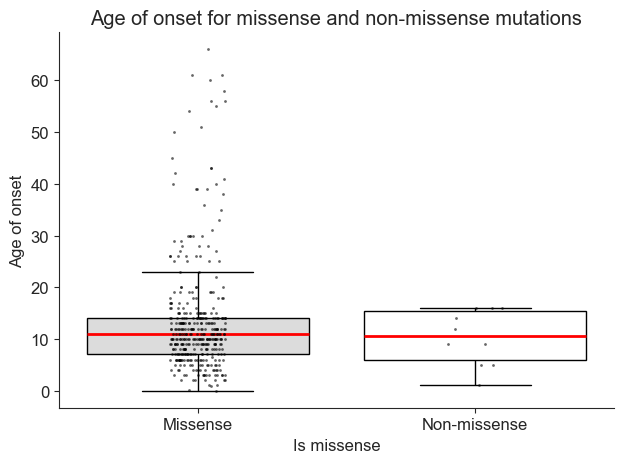

In [19]:
# boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")
# set font size to 12
plt.rcParams.update({'font.size': 12})

#sns.violinplot(x="missense", y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1", data=data_with_age, hue="missense", inner="quart", cut=0)
sns.boxplot(x="missense",
            y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
            data=data_with_age, hue="missense", fliersize=0,
            palette=["gainsboro", "white"],
            linecolor="black",
            medianprops={"color": "r", "linewidth": 2}
            )
sns.stripplot(
    data=data_with_age,
    x="missense",
    y="age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1",
    color="black",
    alpha=0.6,
    size=2
)
plt.ylabel("Age of onset")
plt.xlabel("Is missense")
plt.title("Age of onset for missense and non-missense mutations")

sns.despine()

plt.tight_layout()
plt.savefig(
    "../figures/reviewer2/reviewer2.question3.missense_vs_nonmissense.png",
    dpi=300)
plt.show()

In [15]:
# get the range of age of onset for missense and non-missense
data_with_age.groupby(data_with_age["missense"])[
    "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"].agg(
    ["min", "max"])

,min,max
missense,,
Missense,0.0,66.0
Non-missense,1.0,16.0


In [16]:
# perform Kolmogorov-Smirnov test
from scipy.stats import ks_2samp

kd_res = ks_2samp(
    data_with_age[data_with_age["missense"] == "Missense"][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"],
    data_with_age[~(data_with_age["missense"] == "Missense")][
        "age_of_onset::Catecholaminergic polymorphic ventricular tachycardia 1"]
)
kd_res

KstestResult(statistic=0.18781725888324874, pvalue=0.8204487252248658, statistic_location=16.0, statistic_sign=-1)

In [17]:
kd_res

KstestResult(statistic=0.18781725888324874, pvalue=0.8204487252248658, statistic_location=16.0, statistic_sign=-1)